<a href="https://colab.research.google.com/github/ayush-singh110/Supplement-Sales-Analysis-and-Future-Revenue-Predictor/blob/main/supplement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
df=pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

In [ ]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [ ]:
df.isnull().sum()

,0
Date,0
Product Name,0
Category,0
Units Sold,0
Price,0
Revenue,0
Discount,0
Units Returned,0
Location,0
Platform,0


In [ ]:
df.dtypes

,0
Date,object
Product Name,object
Category,object
Units Sold,int64
Price,float64
Revenue,float64
Discount,float64
Units Returned,int64
Location,object
Platform,object


In [ ]:
df['Day']=df['Date'].str.split('-').str[1]
df['Year']=df['Date'].str.split('-').str[0]
df['Month']=df['Date'].str.split('-').str[2]
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Day,Year,Month
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,01,2020,06
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,01,2020,06
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,01,2020,06
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,01,2020,06
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,01,2020,06


In [ ]:
df.drop('Date',inplace=True,axis=1)

In [ ]:
df.dtypes

,0
Product Name,object
Category,object
Units Sold,int64
Price,float64
Revenue,float64
Discount,float64
Units Returned,int64
Location,object
Platform,object
Day,object


In [ ]:
df['Day']=df['Day'].astype(int)
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)

In [ ]:
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Day,Year,Month
0,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,1,2020,6
1,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,1,2020,6
2,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,1,2020,6
3,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,1,2020,6
4,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,1,2020,6


In [ ]:
rev=df.groupby('Category')['Revenue'].sum().reset_index()
rev.head()

,Category,Revenue
0,Amino Acid,1464819.63
1,Fat Burner,1440900.05
2,Herbal,1405700.79
3,Hydration,1411951.38
4,Mineral,4276107.99


([<matplotlib.patches.Wedge at 0x799c871f2c10>,
 [Text(0.9146165726218474, 0.6111272576848992, 'Amino Acid'),
  Text(-0.21459935904223684, 1.0788638074839016, 'Fat Burner'),
  Text(-1.0162675555991008, 0.4209516070008866, 'Herbal'),
  Text(-1.0162674819975657, -0.42095178469075, 'Hydration'),
  Text(-0.6111270287166031, -0.9146167256135307, 'Mineral'),
  Text(-0.21459942762886586, -1.0788637938411703, 'Omega'),
  Text(0.2145994533595093, -1.078863788723025, 'Performance'),
  Text(0.611127486653157, -0.9146164196301068, 'Protein'),
  Text(0.9146165337706407, -0.6111273158298348, 'Sleep Aid'),
  Text(1.0788638288038408, -0.21459925185964054, 'Vitamin')],
 [Text(0.498881766884644, 0.3333421405553995, '18.8%'),
  Text(-0.11705419584122008, 0.5884711677184917, '18.8%'),
  Text(-0.5543277575995095, 0.22960996745502898, '12.5%'),
  Text(-0.5543277174532176, -0.2296100643767727, '12.5%'),
  Text(-0.3333420156636016, -0.49888185033465304, '6.2%'),
  Text(-0.11705423325210863, -0.588471160277002

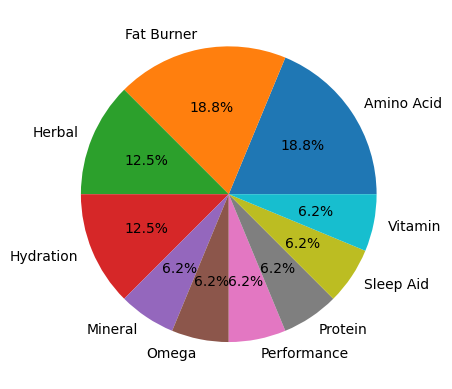

In [ ]:
l=df['Category'].value_counts(normalize=True)
plt.pie(l,labels=rev['Category'],autopct="%1.1f%%")

<Axes: xlabel='Category', ylabel='Revenue'>

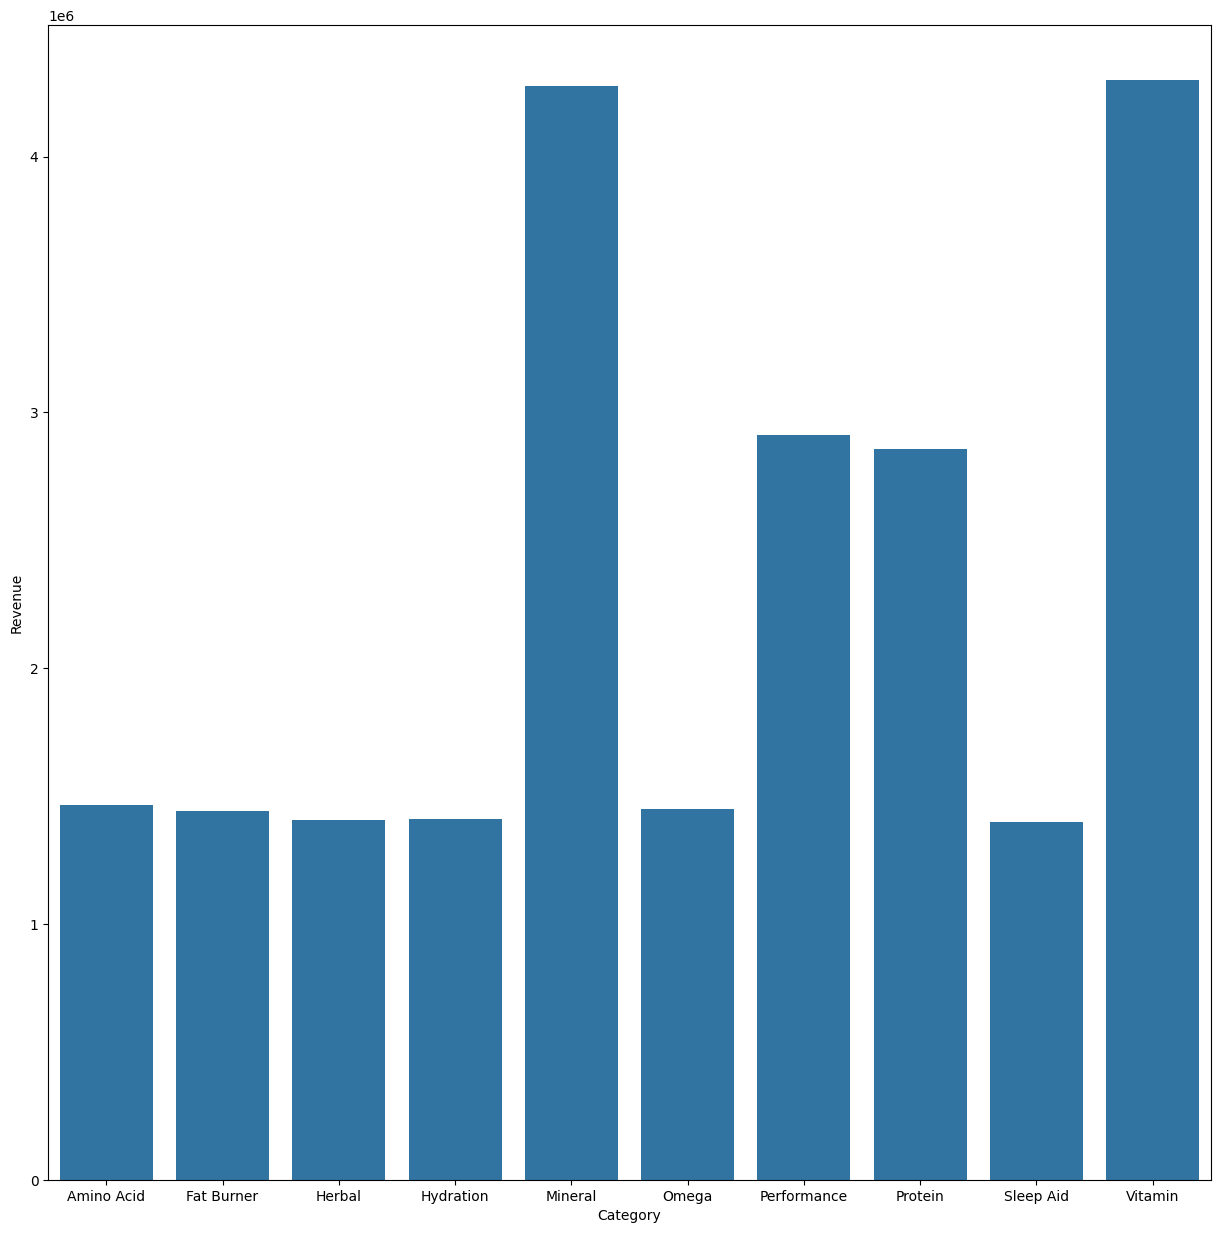

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x=rev['Category'],y=rev['Revenue'])

In [ ]:
prev=df.groupby('Platform')['Revenue'].sum().reset_index()
prev.head()

,Platform,Revenue
0,Amazon,7669451.78
1,Walmart,7388567.62
2,iHerb,7855261.05


<Axes: xlabel='Platform', ylabel='Revenue'>

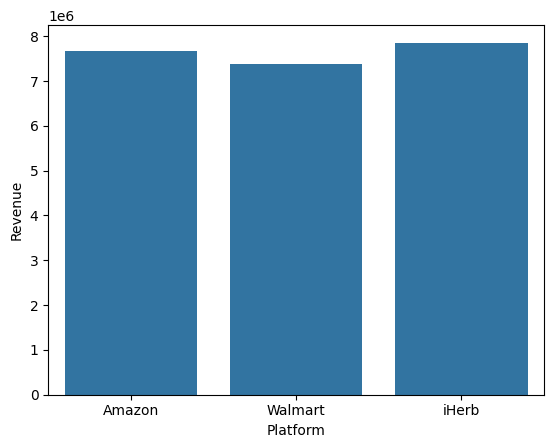

In [ ]:
sns.barplot(x=prev['Platform'],y=prev['Revenue'])

<Axes: xlabel='Platform', ylabel='Units Returned'>

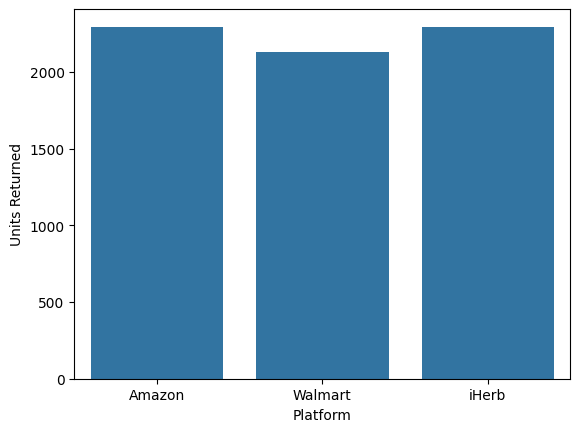

In [ ]:
uret=df.groupby('Platform')['Units Returned'].sum().reset_index()
sns.barplot(x=uret['Platform'],y=uret['Units Returned'])

In [ ]:
numf=[feature for feature in df.columns if df[feature].dtypes!='O']
catf=[feature for feature in df.columns if df[feature].dtypes=='O']
print(numf)
print(catf)
numf.pop(2)
print(numf)

['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned', 'Day', 'Year', 'Month']
['Product Name', 'Category', 'Location', 'Platform']
['Units Sold', 'Price', 'Discount', 'Units Returned', 'Day', 'Year', 'Month']


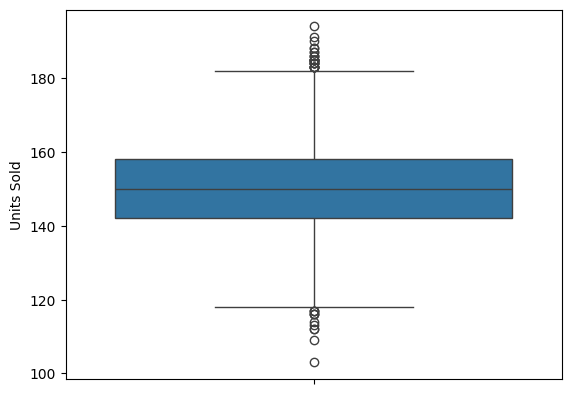

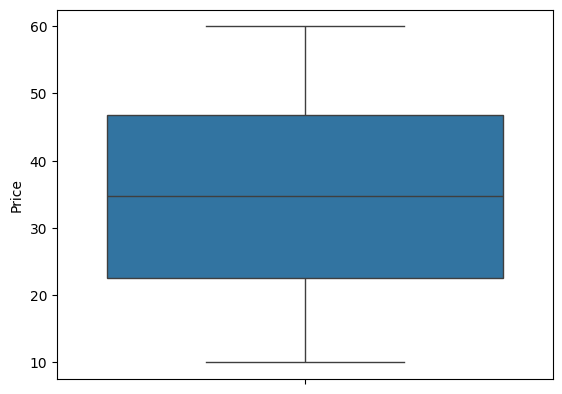

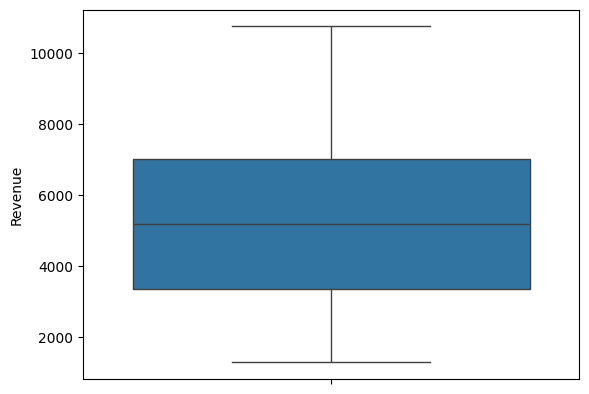

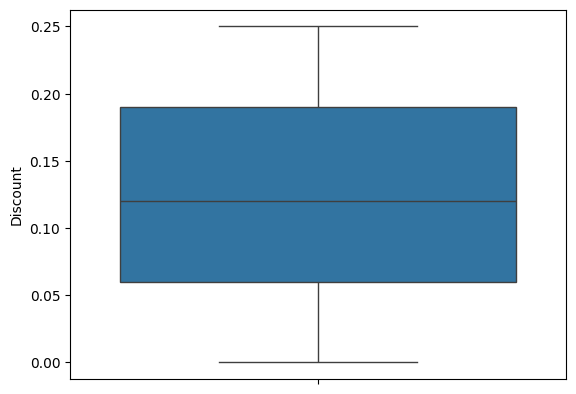

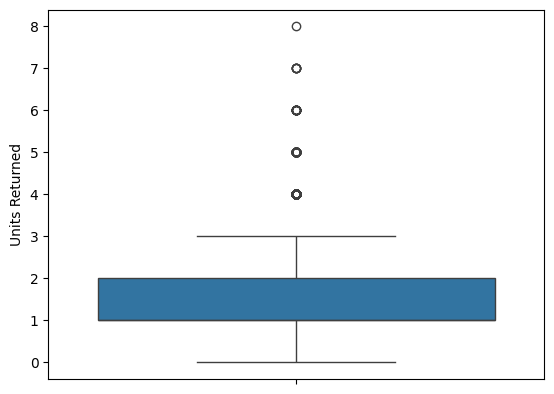

In [ ]:
for i in range(0,5):
    sns.boxplot(data=df[numf[i]])
    plt.show()

In [ ]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
scaler=StandardScaler()
encod=OneHotEncoder(drop='first')
preprocessing=ColumnTransformer(
    [
        ('OneHotEncoder',encod,catf),
        ('StandardScaler',scaler,numf)
    ],remainder='passthrough'
)

In [ ]:
X_train_pt=preprocessing.fit_transform(X_train)
X_test_pt=preprocessing.transform(X_test)

________________________________________
Linear Regression
score: 0.99333187072022
mse: 30586.073674631698
mae: 120.80115947284649


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


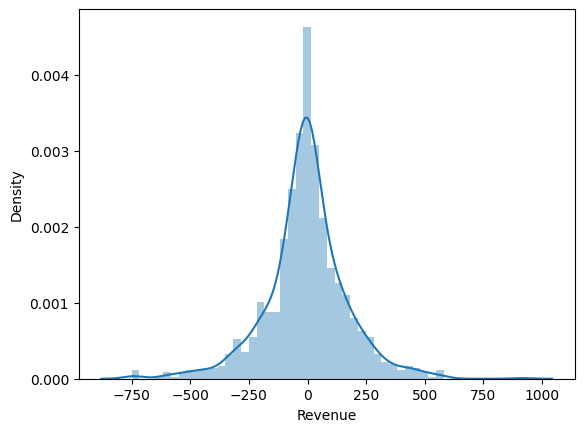

__________________________________________
________________________________________
SVR
score: 0.07616151556877881
mse: 4237559.105813514
mae: 1743.7560283551456


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


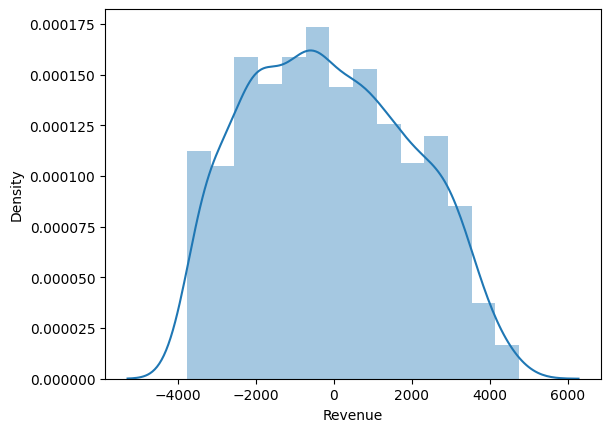

__________________________________________
________________________________________
Ridge
score: 0.9933355728720529
mse: 30569.092256910884
mae: 120.76719413142328


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


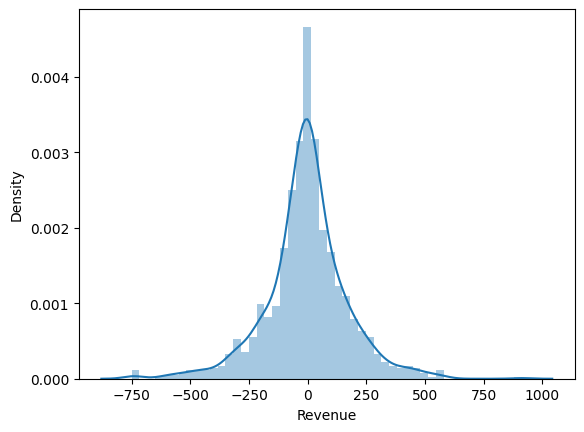

__________________________________________
________________________________________
Lasso
score: 0.9933690354681501
mse: 30415.60251689102
mae: 120.17732921014722


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


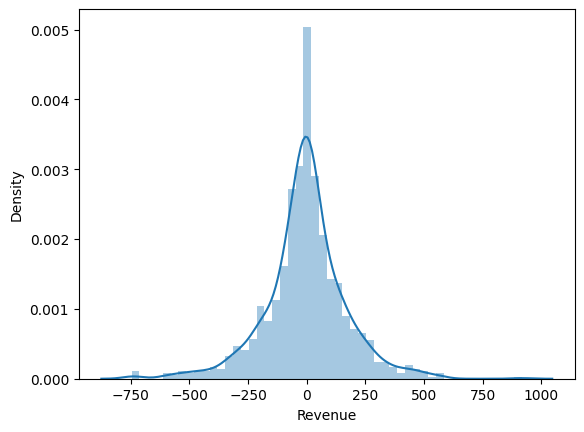

__________________________________________
________________________________________
ElasticNet
score: 0.8856528156785881
mse: 524499.639613584
mae: 602.8084445902242


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


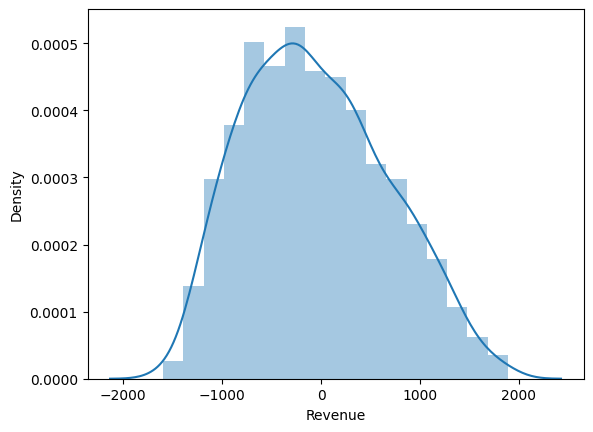

__________________________________________
________________________________________
Decision Tree
score: 0.9975132006699008
mse: 11406.711587773725
mae: 74.11527372262773


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


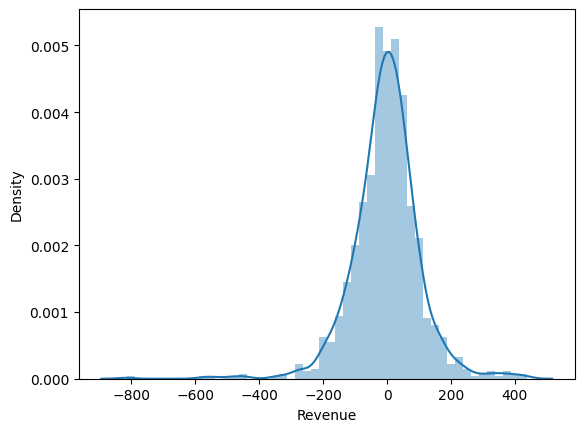

__________________________________________
________________________________________
KNN
score: 0.8684726827241938
mse: 603303.2725720037
mae: 623.0676770072993


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


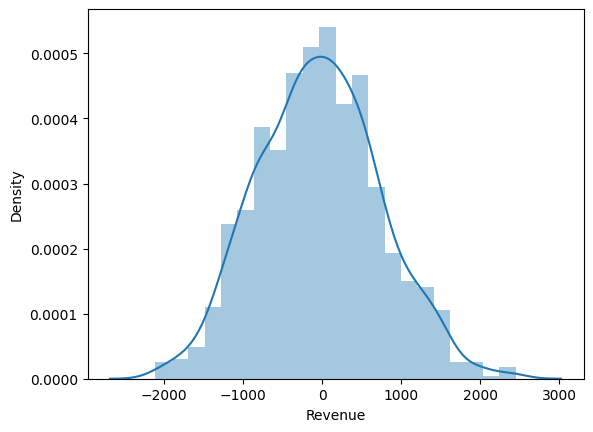

__________________________________________
________________________________________
Random Forest
score: 0.9991412096078341
mse: 3939.1897042998417
mae: 34.67249671532825


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


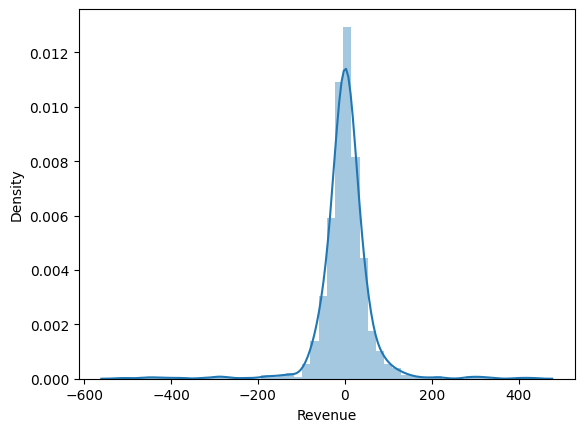

__________________________________________
________________________________________
Ada Boost
score: 0.9819835771528748
mse: 82639.6150156331
mae: 232.31078465621152


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


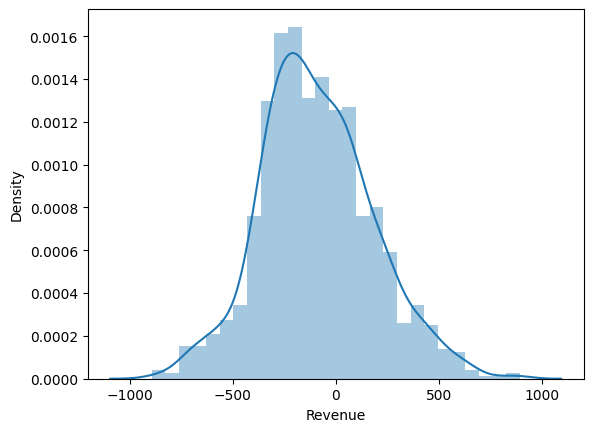

__________________________________________
________________________________________
Gradient Boosting
score: 0.9992523879056688
mse: 3429.2254450733058
mae: 44.504980179086466


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


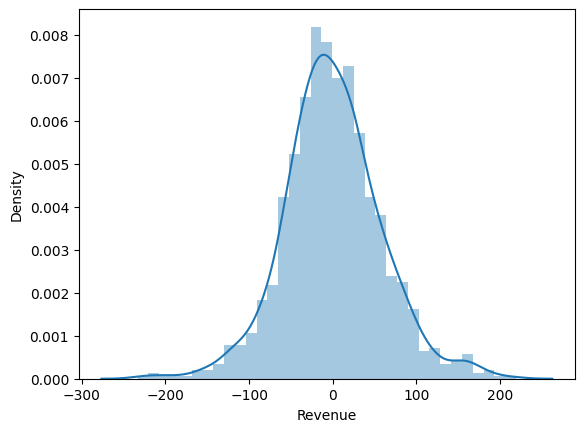

__________________________________________
________________________________________
XGBoost
score: 0.9992895229880586
mse: 3258.8903603394274
mae: 41.54391003239763


<ipython-input-91-7ce59703d769>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


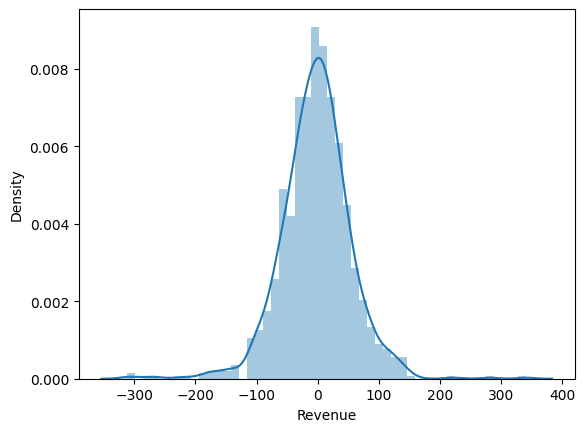

__________________________________________


In [ ]:
models={
    'Linear Regression':LinearRegression(),
    'SVR':SVR(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'ElasticNet':ElasticNet(),
    'Decision Tree':DecisionTreeRegressor(),
    'KNN':KNeighborsRegressor(n_neighbors=5,algorithm='auto'),
    'Random Forest':RandomForestRegressor(),
    'Ada Boost':AdaBoostRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
    'XGBoost':XGBRegressor()
}
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train_pt,y_train)
    ypred=model.predict(X_test_pt)
    print("________________________________________")
    print(list(models.keys())[i])
    print("score:",r2_score(y_test,ypred))
    print("mse:",mean_squared_error(y_test,ypred))
    print("mae:",mean_absolute_error(y_test,ypred))
    residuals=y_test-ypred
    sns.distplot(residuals,kde=True)
    plt.show()
    print("__________________________________________")